# Clustering

In [1]:
using Pkg
Pkg.activate("../../env/.")
Pkg.instantiate()

  Activating project at `~/analogous_neural/env`


In [2]:
include("../../src/analogous_bars.jl")
include("../../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var


WebIO._IJuliaInit()

In [6]:
using DelimitedFiles
using Plots
using CSV
using Distances
using HDF5
using FileIO
using JLD

# 1. Load data 

In [7]:
# load points
data = load("data/clustering/points.jld")
P = collect(transpose(data["points"]))
Q = collect(transpose(data["centroids"]))
D = data["D"];

# prepare distances 
n_points = size(P)[1]
n_centroids = size(Q)[1]

# Define submatrices 
D_P = D[1:n_points, 1:n_points]
D_Q = D[n_points+1:end, n_points+1:end]
D_P_Q = D[1:n_points, n_points+1:end]
    # rows (landmarks): P
    # columns (witness) : Q
D_Q_P = D[n_points+1:end, 1:n_points];
    # rows (landmarks): Q
    # columns (witness) : P

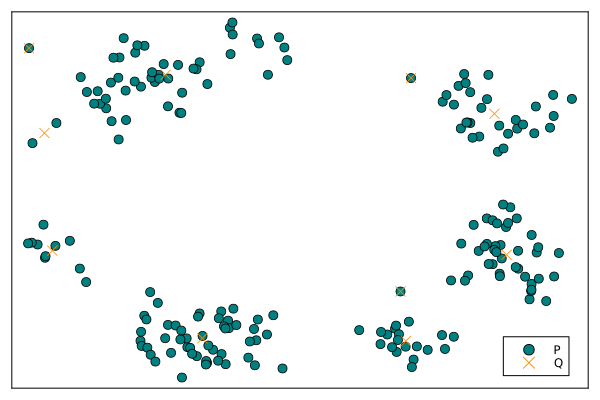

In [9]:
# plot points
plot_P_Q(P,Q)

In [10]:
# Compute Vietoris-Rips persistence on two regions
dim = 1
VR_P = eirene(D_P, record = "all", maxdim = dim)
VR_Q = eirene(D_Q, record = "all", maxdim = dim)

# compute Witness persistence
W_P = compute_Witness_persistence(D_P_Q, maxdim = dim)
#W_Q = compute_Witness_persistence(D_Q_P, maxdim = dim);

Dict{Any, Any} with 8 entries:
  "fv"                         => Any[Any[0.106114, 0.165212, 0.352074, 0.32355…
  "param_max"                  => 4.20733
  "default_vertex_to_W_vertex" => nothing
  "simplex2index"              => Dict([52, 68, 78]=>775236, [116, 118, 155]=>1…
  "eirene_output"              => Dict{String, Any}("rv"=>Any[Int64[], [1, 2, 1…
  "index2simplex"              => Dict((578264, 2)=>[35, 196, 200], (682903, 2)…
  "distance_matrix"            => [0.106114 1.75141 … 4.13572 2.36115; 0.165212…
  "W_vertex_to_default_vertex" => nothing

In [11]:
# plot all PD
barcode_VR_P = barcode(VR_P, dim = 1)
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
#barcode_W_Q = barcode(W_Q["eirene_output"], dim = 1)
barcode_VR_Q = barcode(VR_Q, dim = 1)

1×2 Matrix{Float64}:
 1.99801  3.35192

In [14]:
selected_P, cutoff_P = select_persistent_intervals_IQR(barcode_VR_P)

([24], 0.14409629877935173)

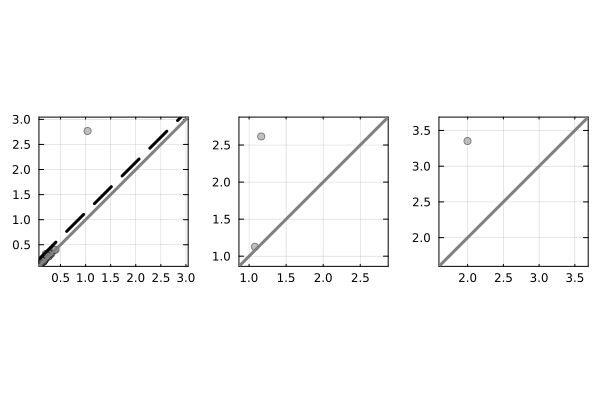

In [16]:
# plot all PD
p1 = plot_PD(barcode_VR_P, cutoff = cutoff_P)
p2 = plot_PD(barcode_W_P)
p3 = plot_PD(barcode_VR_Q)
plot(p1, p2, p3, layout = grid(1,3))

Run similarity-centric analogous bars at birthtime of witness cycle

In [20]:
extension_P, extension_Q = run_similarity_analogous_birthtime(
                                            VR_P = VR_P,
                                            D_P = D_P,
                                            VR_Q = VR_Q,
                                            D_Q = D_Q,
                                            W_PQ = W_P,
                                            W_PQ_bar = 2
                                            );

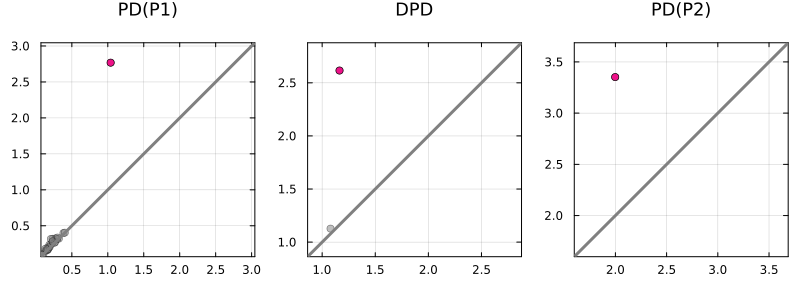

In [21]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 2

# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = extension_P["Ybar_rep_tau"],
            title = "PD(P1)", 
            titlefontsize = 12)

p2 = plot_PD(barcode_W_P; 
            highlight = [witness_idx],
            title = "DPD", 
            titlefontsize = 12)

p3 = plot_PD(barcode_VR_Q; 
            highlight = extension_Q["Ybar_rep_tau"],
            title = "PD(P2)", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

In [22]:
extension_P["Ybar_rep_tau"]

1-element Vector{Int64}:
 24

In [24]:
print(extension_Q["Ybar_rep_tau"])


[1]

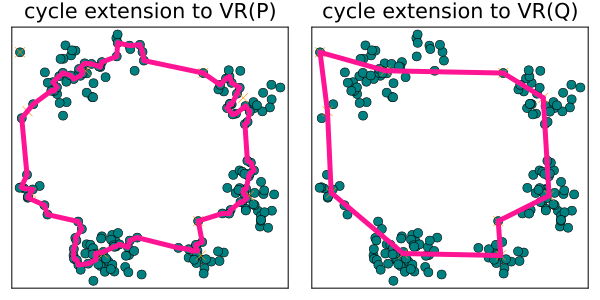

In [25]:
cr_P = get_cyclerep_Eirene(VR_P, 24)
cr_Q = get_cyclerep_Eirene(VR_Q, 1)

p1 = plot_cycle_square_torus(P, Q, cycle = cr_P, cycle_loc = "P", title = "cycle extension to VR(P)"; legend = false)
p2 = plot_cycle_square_torus(P, Q, cycle = cr_Q, cycle_loc = "Q", title = "cycle extension to VR(Q)"; legend = false)

plot(p1, p2, layout = grid(1,2), size = (600, 300))